This week our goal will be to play around with some data for the upcoming election and make predicitons on what the results will be. We'll be going over the numpy polyfit methods and maybe the scipy linear regression if we have time.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read in the excel sheet ElectionData.xlsx


Recall that on windows machines the path will be r'C:\Path_to_file' where Path_to_file is the file path for ElextionData.xlsx


All the data is stored in Sheet1 so lets parse the data from there

In [29]:
xls = pd.ExcelFile("~/Downloads/ElectionData.xlsx")
electionDat = xls.parse("Sheet1")
electionDat

,Date,RCP Clinton,RCP Trump,538 Clinton,538 Trump
0,2016-07-04,44.9,40.3,48.7,42.2
1,2016-07-11,45.4,40.9,48.5,42.3
2,2016-07-18,43.8,40.6,47.1,43.7
3,2016-07-25,44.1,44.3,46.2,44.8
4,2016-08-01,45.9,42.0,47.5,44.3
5,2016-08-08,47.3,40.1,49.9,41.9
6,2016-08-15,47.8,41.0,49.5,40.9
7,2016-08-22,47.0,41.5,48.9,41.7
8,2016-08-29,47.2,41.3,48.5,42.4
9,2016-09-05,45.9,42.3,47.6,43.2


For the first part of this class we'll be working on the Columns marked RCP Clinton and RCP Trump

In [30]:
RCPClinton = electionDat["RCP Clinton"]
RCPTrump = electionDat["RCP Trump"]
RCPClinton

0     44.9
1     45.4
2     43.8
3     44.1
4     45.9
5     47.3
6     47.8
7     47.0
8     47.2
9     45.9
10    45.9
11    44.9
12    46.6
13    47.8
14    47.9
15    48.8
Name: RCP Clinton, dtype: float64

Now let's plot the data we just got. For now we'll ignore dates and just focus on week numbers where week 0 is the first week we have data for

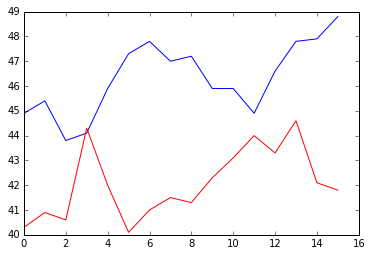

In [125]:
plt.plot(RCPClinton)
plt.plot(RCPTrump,Color="Red")

Now we want to approximate the data and use that approximation to make a guess at the future data points.
A quick google search leads us to the numpy polyfit method. This method requires 2 numpy arrays, one for x values and one for y values so we get arrays for each

In [100]:
np_indexes = np.array(RCPClinton.index.values)
np_clinton = np.array(RCPClinton)
print(np_indexes)
print(np_clinton)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 44.9  45.4  43.8  44.1  45.9  47.3  47.8  47.   47.2  45.9  45.9  44.9
  46.6  47.8  47.9  48.8]


Now we're going to call the numpy polyfit method, which returns an array of coefficents for a polynomial of a degree you provide

In [109]:
coeff = np.polyfit(np_indexes,np_clinton,2)
coeff

array([ -2.10084034e-04,   2.06092437e-01,   4.47955882e+01])

Now we're going to plot our approximation, but how do we plot a polynomial?

A quick google search gives up np.polyval which evaluates a polynomial with given coefficents

In [127]:
print(np.polyval(coeff,1))
print(np.polyval(coeff,[1,2,3]))

45.0014705882
[ 45.00147059  45.20693277  45.41197479]


All Right let's plot our approximation now using numpy.polval()

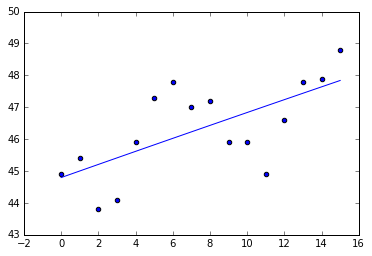

In [135]:
plt.plot(np.polyval(coeff,np_indexes))
#plot old data for refrence
plt.scatter(np_indexes,np_clinton)

All Right now you guys should try this with the data from Trump on your own. The process will be very similar

In [70]:
np_trump = np.array(RCPTrump)
np_trump

array([ 40.3,  40.9,  40.6,  44.3,  42. ,  40.1,  41. ,  41.5,  41.3,
        42.3,  43.1,  44. ,  43.3,  44.6,  42.1,  41.8])

In [106]:
t_coeff = np.polyfit(np_indexes,np_trump,2)
t_coeff

array([ -8.36834734e-03,   2.81113445e-01,   4.06151961e+01])

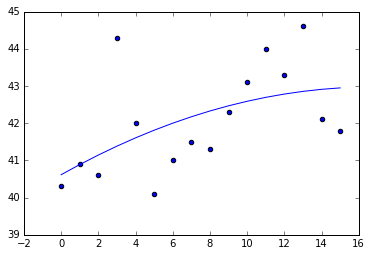

In [107]:
plt.plot(np.polyval(t_coeff,np_indexes))
plt.scatter(np_indexes,np_trump)

Finally lets graph our approximations together and give them a legend so that they look nice

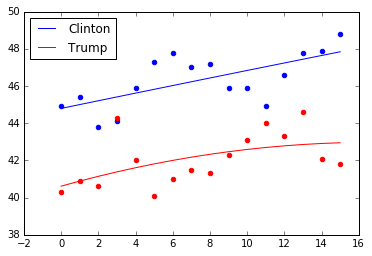

In [111]:
plt.plot(np.polyval(coeff,np_indexes),label = "Clinton", color = "blue")
plt.scatter(np_indexes,np_clinton,color ="blue" )
plt.plot(np.polyval(t_coeff,np_indexes),label = "Trump",color = "red")
plt.scatter(np_indexes,np_trump,color = "red")
plt.legend(loc = "upper left")


Now let's try to plot our prediction for how the election will turn out. The easiest way to do this is to extend the array of inedexes to contain 16,17,18 using numpy append

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


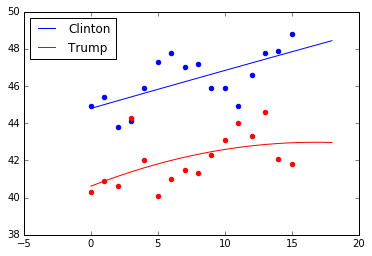

In [112]:
new_np_indexes = np.append(np_indexes,[16,17,18])
print(new_np_indexes)
plt.plot(np.polyval(coeff,new_np_indexes),label = "Clinton", color = "blue")
plt.scatter(np_indexes,np_clinton,color ="blue" )
plt.plot(np.polyval(t_coeff,new_np_indexes),label = "Trump",color = "red")
plt.scatter(np_indexes,np_trump,color = "red")
plt.legend(loc = "upper left")


Now Lets write a function to make an approximation and plot it so we can try mutiple degrees of approximation

In [121]:
def plot_prediction(Clinton,Trump,indexes,Deg):
        C_coeff = np.polyfit(indexes,Clinton,Deg)
        T_coeff = np.polyfit(indexes,Trump,Deg)
        new_indexes = np.append(indexes,[16,17,18])
        plt.plot(np.polyval(C_coeff,new_indexes),label = "Clinton", color = "blue")
        plt.scatter(indexes,Clinton,color ="blue" )
        plt.plot(np.polyval(T_coeff,new_indexes),label = "Trump",color = "red")
        plt.scatter(indexes,Trump,color = "red")
        plt.legend(loc = "upper left")

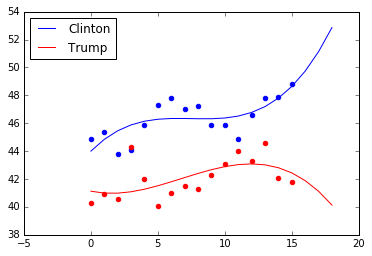

In [134]:
plot_prediction(np_clinton,np_trump,np_indexes,3)

Awesome! Now we're going to give you a chance to play around with the data. Use the 538 data which to make a prediction. Then if you have time, average the 2 sets of data and make a prediciton based off of that data.